In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [117]:
Rh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h1_DW.csv', index_col=0)
Rh2 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h2_DW.csv', index_col=0)
Rh3 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h3_DW.csv', index_col=0)
Rh5 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h5_DW.csv', index_col=0)
Rh6 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h6_DW.csv', index_col=0)
Rh7 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h7_DW.csv', index_col=0)
Rh9 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h9_DW.csv', index_col=0)
Rh10 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h10_DW.csv', index_col=0)
UKh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\UK_h1_DW.csv', index_col=0)
Rh13 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h13_DW.csv', index_col=0)
Rh15 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h15_DW.csv', index_col=0)
Rh16 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h16_DW.csv', index_col=0)
Rh18 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h18_DW.csv', index_col=0)
Rh20 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h20_DW.csv', index_col=0)
Rh21 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h21_DW.csv', index_col=0)

In [118]:
Rh1 = Rh1.values
Rh2 = Rh2.values
Rh3 = Rh3.values
Rh5 = Rh5.values
Rh6 = Rh6.values
Rh7 = Rh7.values
Rh9 = Rh9.values
Rh10 = Rh10.values
UKh1 = UKh1.values
Rh13 = Rh13.values
Rh15 = Rh15.values
Rh16 = Rh16.values
Rh18 = Rh18.values
Rh20 = Rh20.values
Rh21 = Rh21.values

In [119]:
UKh1.shape

(444, 1440)

In [120]:
combined = np.stack((Rh1,Rh2,Rh3,Rh5,Rh6,Rh7,Rh9,Rh10,Rh13,Rh15,Rh16,Rh18,Rh20,Rh21,UKh1))
combined.shape

(15, 444, 1440)

In [121]:
X_train, X_test = train_test_split(combined, test_size=0.28, random_state=1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

(10, 444, 1440)
(5, 444, 1440)


In [122]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = X_test.shape[1:]
latent_dim = 128
autoencoder = Autoencoder(latent_dim, shape)

In [123]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [124]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
1/1 [==============================] - 27s 27s/step - loss: 0.2500 - val_loss: 0.2499
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 0.2499 - val_loss: 0.2495
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.2490 - val_loss: 0.2445
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.2388 - val_loss: 0.2143
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.1883 - val_loss: 0.1400
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.1129 - val_loss: 0.0731
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0671 - val_loss: 0.0498
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: 0.0487 - val_loss: 0.0465
Epoch 9/10
1/1 [==============================] - 4s 4s/step - loss: 0.0411 - val_loss: 0.0467
Epoch 10/10
1/1 [==============================] - 3s 3s/step - loss: 0.0366 - val_loss: 0.0468


In [125]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [126]:
decoded_imgs.shape

(5, 444, 1440)

In [127]:
print(decoded_imgs[0])

[[0.0007015  0.00073472 0.00068148 ... 0.00066996 0.00064814 0.0007321 ]
 [0.00075306 0.00064303 0.00068323 ... 0.00070758 0.00067916 0.00068961]
 [0.00067701 0.00066604 0.0006969  ... 0.00063535 0.00067784 0.00073543]
 ...
 [0.00066639 0.00067415 0.00067204 ... 0.00072913 0.00077451 0.00070741]
 [0.0007668  0.00064856 0.00059473 ... 0.00069574 0.00071373 0.00078094]
 [0.00070874 0.00072971 0.00067426 ... 0.0006272  0.00068447 0.0005892 ]]


In [183]:
def binary(cell):
    if cell <= 0.1:
        return 0
    elif cell >= 0.1:
        return 1

In [184]:
func = np.vectorize(binary)

In [185]:
binary0 = func(decoded_imgs[0])
binary1 = func(decoded_imgs[1])
binary2 = func(decoded_imgs[2])
binary3 = func(decoded_imgs[3])
binary4 = func(decoded_imgs[4])

In [186]:
binary = np.stack((binary0,binary1,binary2,binary3,binary4))

In [187]:
#df.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\inspect.csv')

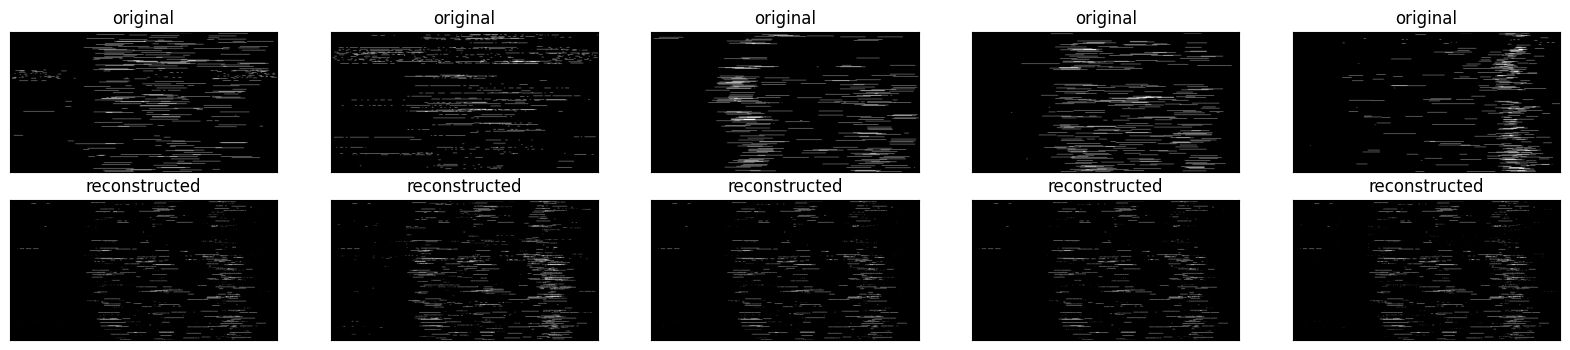

In [191]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i], aspect= 'auto')
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

    # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(binary[i], aspect = 'auto')
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()